Emma Simmons, Date last modified: 3/1/21

In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

$\textbf{Question 1(a).}$

In [6]:
#solves a tridiagonal system
#A is the tridiagonal matrix, d is the column vector
#outputs the x vector that was solved for

def tridiagonal_slvr(A,d):
    n=len(d)
    a=np.zeros(n)
    c=np.zeros(n-1)
    b=np.zeros(n-1)
    for i in range(0,n-2):
        a[i]=A[i][i]
        c[i]=A[i+1][i]
        b[i]=A[i][i+1]
    c[n-2]=A[n-1][n-2]
    b[n-2]=A[n-2][n-1]
    a[n-2]=A[n-2][n-2]
    a[n-1]=A[-1][-1]
    m=np.zeros(n)
    l=np.zeros(n)
    y=np.zeros(n)
    x=np.zeros(n)
    m[0]=a[0]
    for j in range(0,n-1):
        l[j]=(c[j]/m[j])
        m[j+1]=a[j+1]-(l[j]*b[j])
    y[0]=d[0]
    for j in range(1,n):
        y[j]=d[j]-l[j-1]*y[j-1]
    x[n-1]=y[n-1]/m[n-1]
    for j in reversed(range(0,n-1)):
        x[j]=(y[j]-(b[j]*x[j+1]))/m[j]
    return x 
    

$\textbf{Question 1(b).}$

In [7]:

A = np.array([[1,-4,0,0], [3,4,-1,0],[0,2,3,4],[0,0,1,3]])

d1 = np.array([1,0,1,0])
x = np.linalg.solve(A, d1)
print("The solution according to np.linalg.solve(A, d1) is", x)

print("The solution our tridiagonal solver returns is", tridiagonal_slvr(A,d1))

print("So, our tridiagonal solver implementation is correct.")


The solution according to np.linalg.solve(A, d1) is [ 0.44186047 -0.13953488  0.76744186 -0.25581395]
The solution our tridiagonal solver returns is [ 0.44186047 -0.13953488  0.76744186 -0.25581395]
So, our tridiagonal solver implementation is correct.


$\textbf{Question 2(a).}$

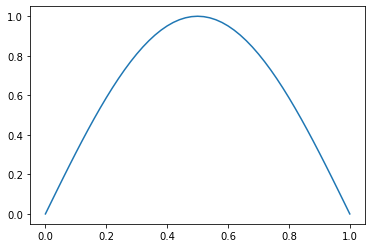

In [12]:
#finds a numerical approximation to the solution of the boundary value problem using the matrix form of the BVP given in class
#N is number of nodes
#outputs the solution vector of the tridiagonal solver for the BVP matrix 

def bvp(N):
    xj = np.linspace(0,1,N + 1)
    h=1/N
    A=np.zeros((N-1, N-1))
    for i in range(0,N-2):
        A[i][i]=2+((np.pi**2)*(h**2))
        A[i+1][i]=-1
        A[i][i+1]=-1
    A[N-2][N-2]=2+((np.pi**2)*(h**2))
    return tridiagonal_slvr((1/h**2)*A, (2*np.pi**2*np.sin(np.pi*xj)[1:-1]))

#plots the soltuion for N=50, u1 combines the solution of BVP solver with BVP points v1=0, vN=0
N1=50
xj = np.linspace(0,1,N1 + 1)
u1= np.concatenate([[0], bvp(N1),[0]])
plt.plot(xj,u1)

$\textbf{Question 2(b).}$<br>
We will show the exact solution to the boundary value problem is $u(x)=sin(\pi x)$. <br>
$u'(x)=\pi cos(\pi x)$ <br>
$u''(x)=-{\pi}^2sin(\pi x)$<br>
$u''+\pi^2 u=-(-{\pi}^2sin(\pi x))+\pi^2 sin(\pi x)=2\pi^2sin(\pi x)$<br>
$u(0)=sin(\pi*0)=0$<br>
$u(1)=sin(\pi*1)=0$<br>
$u(0)=u(1)=0$

$\textbf{Question 2(c).}$

In [13]:
N1=50
xj_1=np.linspace(0,1,N1+1)
actual50=[np.sin(np.pi*x) for x in xj_1]
error1=actual50-(u1)
print("The error of the approximation in the 2-norm for N = 50 is", LA.norm(error1))


N2=100
xj_2=np.linspace(0,1,N2+1)
u2=np.concatenate([[0], bvp(N2),[0]])
actual100=[np.sin(np.pi*x) for x in xj_2]
error2=actual100-(u2)
print("The error of the approximation in the 2-norm for N = 100 is", LA.norm(error2))



LA.norm(error2)/LA.norm(error1)

The error of the approximation in the 2-norm for N = 50 is 0.0008224940857685608
The error of the approximation in the 2-norm for N = 100 is 0.0002907883995157151


0.3535446692531467

Since the expected numerical error is $O(h^2)$ and here $h=1/N$, we expect doubling $N$ to decrease the error by a factor of $1/4$ or $0.25$, but instead we get approxmately $0.35$.

$\textbf{Question 2(d).}$

To find the convergence without an exact solution, we could check the spectral radius of the iteration matrix of the given matrix, and if it is less than 1, we know it will converge. To find the rate of convergence, we can increase the nodes, N, by a consistent factor of 2 for example and then find the ratio of the errors. Then, we take $log_2(x)$, where $x$ is the ratio that was just found to obtain the rate of convergence. 